# Challenge Data MNIST : séance 2

## Notebook Python

In [3]:
# Importation des données 
from utilitaires_chargement_ import *

## Rappel sur les images numériques en Python

Affichons une image `x` de taille $28 \times 28$ que nous avons importée, grâce à la fonction `affichage`

In [ ]:
# Dans cette cellule, afficher l'image x


* Pour accèder à la valeur d'un pixel $(i,j)$ de $x$ :  `x[i,j]`.
* Afficher une valeur :  fonction `print()`

In [ ]:
# Dans cette cellule, afficher le pixel (14, 14) de l'image x


<br><br><br>

***
***

<br><br><br>

# Challenge MNIST-4 : classifier les chiffres 0, 1, 4, 8

La base de données MNIST-4 contient des images de 0, de 1, de 4 et de 8 de taille $28 \times 28$. 

* Images d'entraînement : liste `x_train_4`.
* Images de test : liste `x_test_4`. 



* Chiffres $y \in \{0,1, 4, 8\}$ associés aux images de `x_train_4` : `y_train_4`

## 1.Visualisation d'images d'entraînement 

* `x_train_par_population[0]` est une liste contenant toutes les images de 0.
* `x_train_par_population[1]` est une liste contenant toutes les images de 1.
* `x_train_par_population[2]` est une liste contenant toutes les images de 4.
* `x_train_par_population[3]` est une liste contenant toutes les images de 8.

In [ ]:
# Dans cette cellule, afficher la huitième image au sein de la population de chiffres 4


Exécutez la cellule ci-dessous afin d'afficher les dix premières images au sein de chaque population.

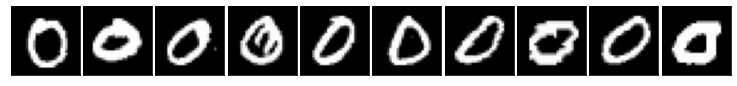

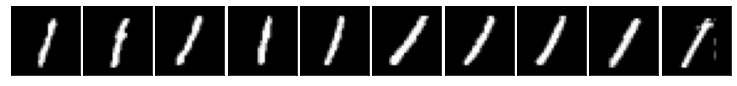

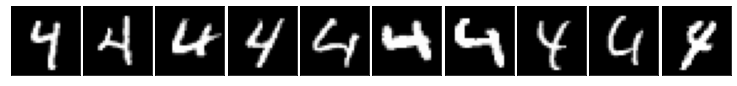

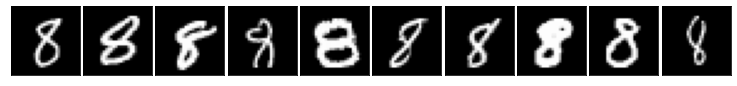

In [4]:
# Affichage des dix premières images de 0
affichage_dix(x_train_par_population[0])

# Affichage des dix premières images de 1
affichage_dix(x_train_par_population[1])

# Affichage des dix premières images de 4
affichage_dix(x_train_par_population[2])

# Affichage des dix premières images de 8
affichage_dix(x_train_par_population[3])

<br><br><br>

***
***

<br><br><br>

## 2. Trouver deux caractéristiques discriminantes au lieu d'une seule

**Benchmark :** Proposition de deux caractéristiques utilisées comme référence 

In [7]:
# Fonction proposée, utilisée comme référence

def deux_caracteristiques(x):
    # Initialisation des deux caractéristiques à 0 : somme[0] représentant la valeur moyenne des pixels sur 
    # la moitié supérieure de l'image, et somme[1] sur la moitié inférieure
    c1 = 0
    c2 = 0
    for i in range(14):  # on ne parcourt que les lignes de la moitié supérieure
        for j in range(28): 
            c1 = c1 + x[i,j]   # rajout de la valeur du pixel (i,j) à la somme
            c2 = c2 + x[i+14,j]  # décalage de 14 pour parcourir les lignes de la moitié inférieure
    
    return c1, c2

<b><font color=red> Vous définirez ci-dessous vos deux propres caractéristiques en modifiant la cellule suivante</font></b>.

In [ ]:
def deux_caracteristiques(x):
    
    c1 = ...
    c2 = ...
    
    return [c1, c2] # Renvoit deux caractéristiques sous la forme d'une liste à deux éléments [c1, c2]

On calcule ces deux caractéristiques sur toutes les images de `x_train_4`, et on stocke les résultats dans une liste `c_train`. 

Exécutez la cellule suivante qui calcule la liste `c_train`.

In [8]:
# On commence par définir et initialiser la liste c_train (vide au début)
c_train = []

# On la remplit à l'aide d'une boucle for :
for x in x_train_4:
    c_train.append(deux_caracteristiques(x))

### Visualisation dans le plan des caractéristiques des différentes populations

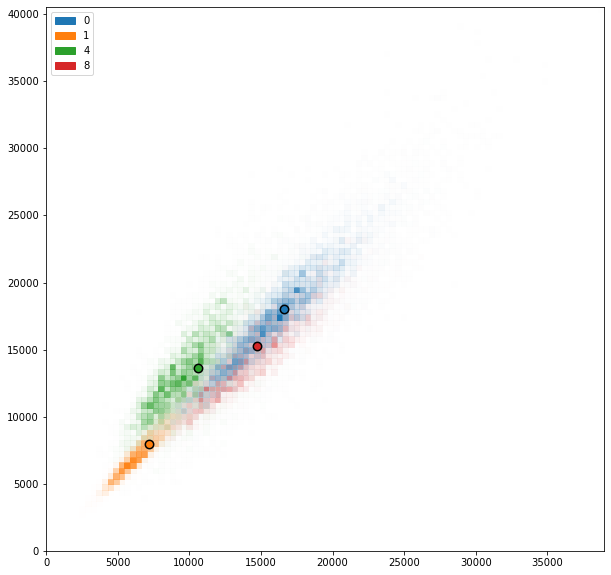

In [9]:
visualiser_histogrammes_2d_mnist_4(c_train)

<br><br><br>

***
***

<br><br><br>

## 3. Calcul de l'erreur (et donc du score)

### Erreur sur l'ensemble d'entraînement

On donne la fonction `classification_2d_MNIST4(c, theta)` qui prend en entrée la caractéristique $c(x)$ d'une image et les paramètres `theta` (liste des paramètres), et qui donne la classe de $x$.

In [ ]:
c_train_par_population = par_population(c_train)

# Paramètre theta = [theta_0, theta_1, ...]
theta = [np.mean(c_train_par_population[i], axis = 0) for i in range(4)]

# On commence par définir et initialiser la liste y_est_train (vide au début)
y_est_train = []

# On remplit y_est_train à l'aide d'une boucle :
for c in c_train:
    y_est_train.append(classification_2d_MNIST4(c, theta))

Exécutez la cellule suivante afin de calculer le taux d'erreur de notre algorithme sur toute les images d'entraînement, à l'aide de la fonction `score()` précédemment définie.

In [ ]:
# Affichage du score
print("Score =", f"{100*score(y_est_train, y_train_4):.2f}%")

<b><font color=red> Qu'en concluez-vous ? </font></b>

<br><br><br>

***
***

<br><br><br>

### Erreur sur l'ensemble de test

On applique maintenant l'algorithme de classification précédent aux images de test `x_test_4`. On commence comme pour les images d'entraînement par calculer leurs caractéristiques et les stocker dans une liste `c_test`. 

<b><font color=red> Exécutez la cellule suivante :  </font></b> 

In [ ]:
# On commence par définir et initialiser la liste c_test (vide au début)
c_test = []

# On la remplit à l'aide d'une boucle for :
for x in x_test_4:
    c_test.append(deux_caracteristiques(x))
    
y_est_test = []

# On remplit y_est_test à l'aide de notre algorithme de classification :
for c in c_test:
    y_est_test.append(classification_2d_MNIST4(c, theta))

# Sauve et télécharge les estimations `y_est_test` : 
sauver_et_telecharger_mnist_4(y_est_test, 'y_est_test.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/117)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?